In [1]:
# for basic libraries
import numpy as np
import pandas as pd
#import pandas_profiling as profile

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for interativity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [2]:
# lets read the dataset

anime = pd.read_csv('anime.csv')
ratings = pd.read_csv('rating.csv')

In [3]:
# lets check the shape of the dataset

print("Shape of the Anime Dataset :", anime.shape)
print("Shape of the Ratings Dataset :", ratings.shape)

Shape of the Anime Dataset : (12294, 7)
Shape of the Ratings Dataset : (7813737, 3)


In [4]:
# lets check the head of the anime dataset
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [107]:
len(anime['anime_id'].unique())

12294

In [5]:
# lets also check the sample of the anime dataset
anime.sample(3)

,anime_id,name,genre,type,episodes,rating,members
29,2001,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi",TV,27,8.78,562962
9109,13819,Kamiusagi Rope 2,"Comedy, Slice of Life",Movie,12,5.41,100
4473,2399,Tottoko Hamtarou OVA 1: Hamtaro no Otanjoubi -...,"Adventure, Comedy, Kids",OVA,1,6.72,1239


In [6]:
# lets check the info of the dataset
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [7]:
# lets check the datatypes of the attributes inside data
anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [8]:
# lets check the null values in the anime dataset
x = anime.isnull().sum()
x = pd.DataFrame(x)
x.style.bar(color = 'grey')

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [9]:
# lets check the head of the ratings dataset
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [10]:
# lets check the null values in the anime dataset
x = ratings.isnull().sum()
x = pd.DataFrame(x)
x.style.bar(color = 'grey')

,0
user_id,0
anime_id,0
rating,0


In [11]:
# lets check the sample of the ratings dataset
ratings.sample(3)

,user_id,anime_id,rating
5921330,55297,15417,-1
3890993,36579,20449,4
7586291,71111,6372,9


In [108]:
anime.type.unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [110]:
df_movies=anime[anime["type"]=='Movie']

In [111]:
df_movies.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193


In [112]:
df_movies.sort_values(['members','rating'],ascending=False)

,anime_id,name,genre,type,episodes,rating,members
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
24,164,Mononoke Hime,"Action, Adventure, Fantasy",Movie,1,8.81,339556
35,431,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",Movie,1,8.74,333186
411,1689,Byousoku 5 Centimeter,"Drama, Romance, Slice of Life",Movie,3,8.10,324035
132,2236,Toki wo Kakeru Shoujo,"Adventure, Drama, Romance, Sci-Fi",Movie,1,8.44,289206
...,...,...,...,...,...,...,...
10153,33318,Scripta Volant,NaN,Movie,1,6.27,22
10719,33319,Wareware no Heya,NaN,Movie,1,8.00,15
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10424,33320,Suijun Genten,NaN,Movie,1,7.00,13


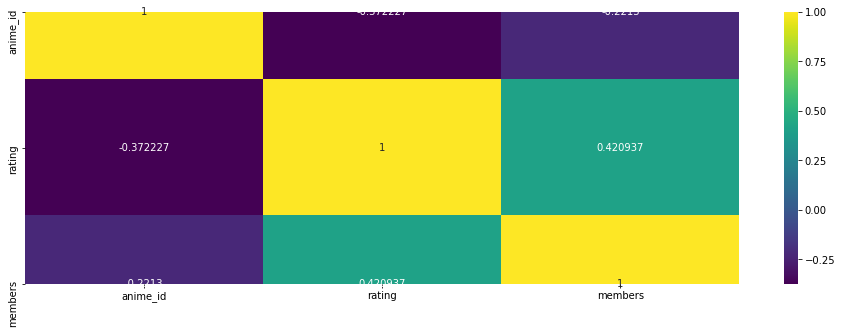

In [113]:
plt.figure(figsize = (16,5))
df_check=df_movies.corr()
sns.heatmap(df_check, annot=True, fmt="g", cmap='viridis')
plt.show()

In [114]:
print(df_movies['members'].mean())
print(df_movies['rating'].mean())

10360.340715502556
6.318058336961246


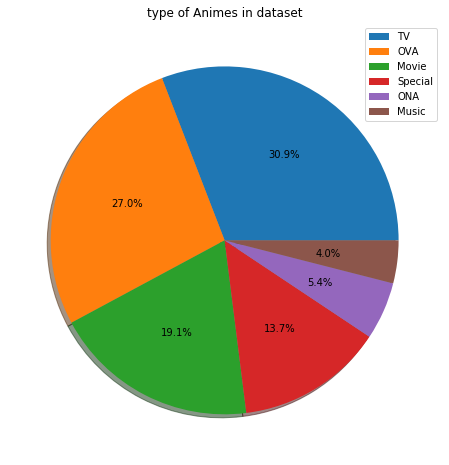

In [115]:
anime['type'].value_counts().plot.pie(autopct='%.1f%%',labels=None,shadow=True,figsize=(8,8))
plt.title('type of Animes in dataset')
plt.ylabel('')
plt.legend(anime['type'].value_counts().index.tolist(),loc='upper right')
plt.show()

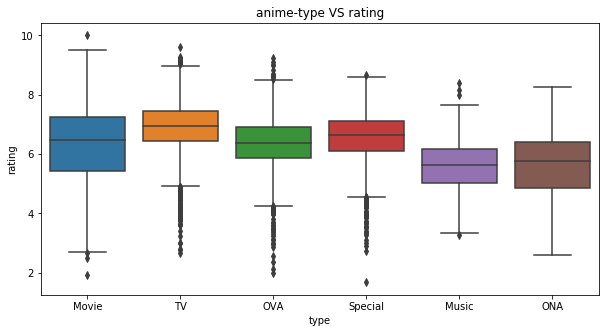

In [116]:
plt.figure(figsize=(10,5))
sns.boxplot(x='type',y='rating',data=anime)
plt.title('anime-type VS rating')
plt.show()

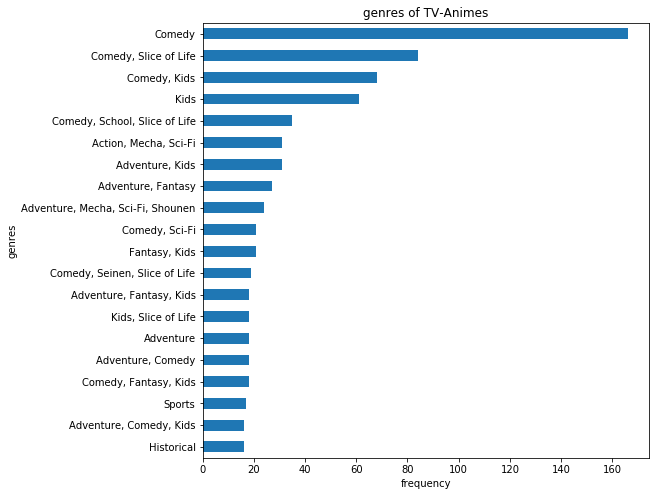

In [117]:
TV_anime=anime[anime['type']=='TV']
TV_anime['genre'].value_counts().sort_values(ascending=True).tail(20).plot.barh(figsize=(8,8))
plt.title('genres of TV-Animes')
plt.xlabel('frequency')
plt.ylabel('genres')
plt.show()

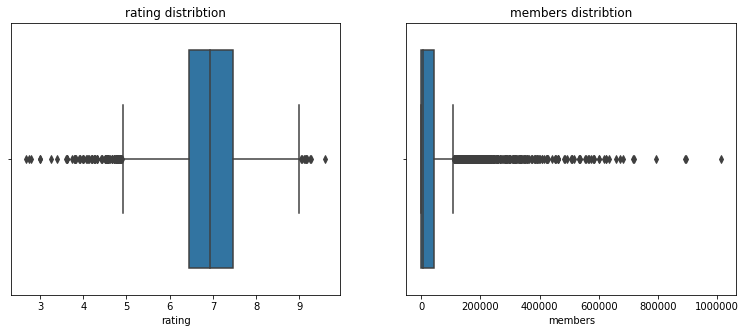

In [119]:
fig=plt.figure(figsize=(13,5))
for i,j in zip(TV_anime[['rating','members']].columns,range(3)):
    ax=fig.add_subplot(1,2,j+1)
    sns.boxplot(i,data=TV_anime,ax=ax)
    plt.title('{} distribtion'.format(i))
plt.show()

In [12]:
# lets check the basic statistics of the dataset
x = anime.describe()
x.style.bar(color = ['pink', 'silver'], align = 'mid')

,anime_id,rating,members
count,12294,12064,12294
mean,14058.2,6.4739,18071.3
std,11455.3,1.02675,54820.7
min,1,1.67,5
25%,3484.25,5.88,225
50%,10260.5,6.57,1550
75%,24794.5,7.18,9437
max,34527,10,1.01392e+06


In [13]:
# lets check the correlation in anime dataset
x = anime.corr()
x.style.bar(color = ['silver', 'gold'], align = 'mid')

,anime_id,rating,members
anime_id,1,-0.284625,-0.0800712
rating,-0.284625,1,0.387979
members,-0.0800712,0.387979,1


In [14]:
# lets check the correlation in anime dataset
x = anime.cov()
x.style.bar(color = ['silver', 'gold'], align = 'mid')

,anime_id,rating,members
anime_id,1.31224e+08,-3290.7,-5.02837e+07
rating,-3290.7,1.05421,22019.5
members,-5.02837e+07,22019.5,3.00531e+09


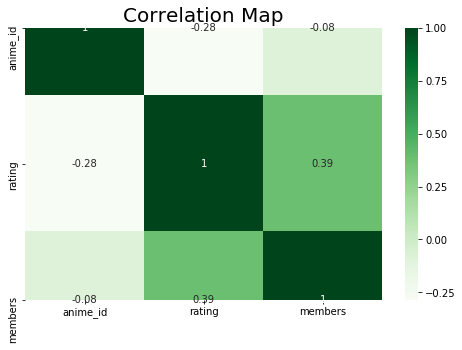

In [15]:
# lets check the heatmap of the dataset based on correlation

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(anime.corr(),
            cmap = 'Greens',
            annot = True)
plt.title('Correlation Map', fontsize = 20)
plt.show()

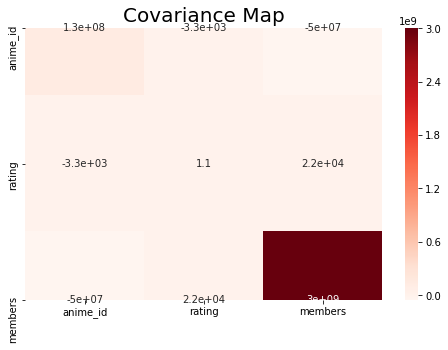

In [16]:
# lets check the heatmap of the dataset based on correlation

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(anime.cov(),
            cmap = 'Reds',
            annot = True)
plt.title('Covariance Map', fontsize = 20)
plt.show()

In [17]:
# lets check the profile of the Anime Dataset
#profile.ProfileReport(anime)

In [18]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [19]:
# lets check the columns inside the anime dataset
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

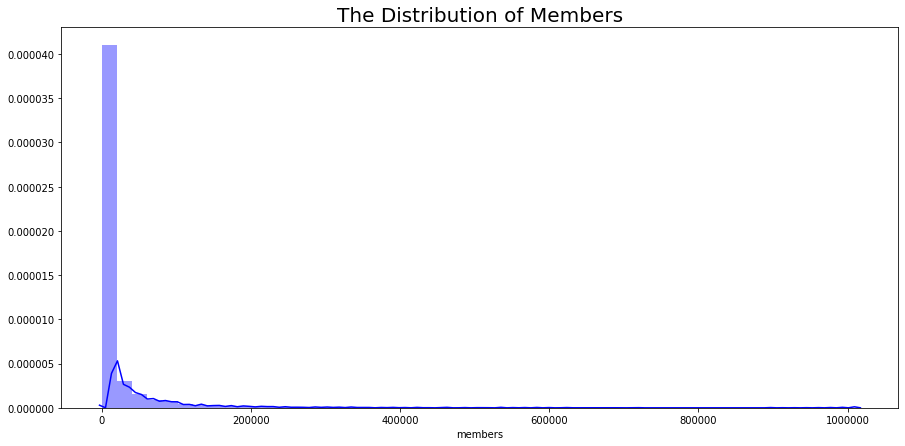

In [20]:
# lets check the univariate distribution 

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(anime['members'], color = 'blue')
plt.title('The Distribution of Members', fontsize = 20)
plt.show()

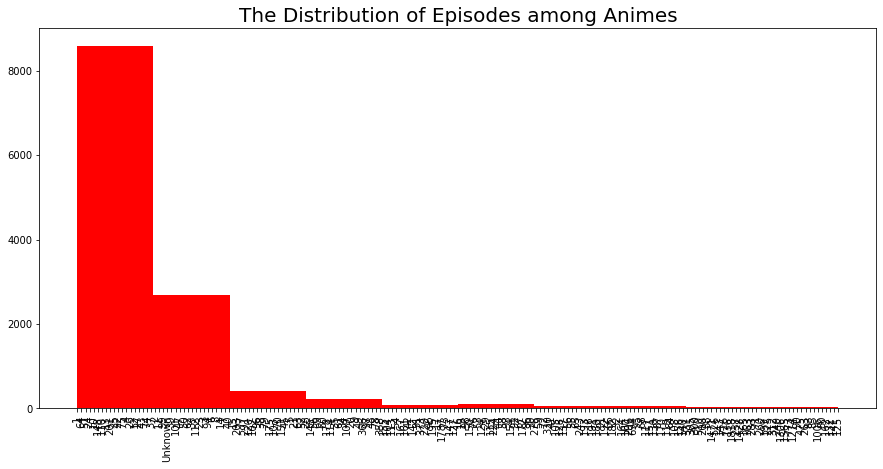

In [21]:
# lets check the univariate distribution 

plt.rcParams['figure.figsize'] = (15, 7)
plt.hist(anime['episodes'], color = 'red')
plt.xticks(rotation = 90)
plt.title('The Distribution of Episodes among Animes', fontsize = 20)
plt.show()

In [22]:
# we can see that there is an unknown value lets replace that value with 1
anime['episodes'] = anime['episodes'].replace('Unknown', 1)

# lets also check the datatype of the episodes attributes
type(anime['episodes'])

pandas.core.series.Series

In [23]:
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

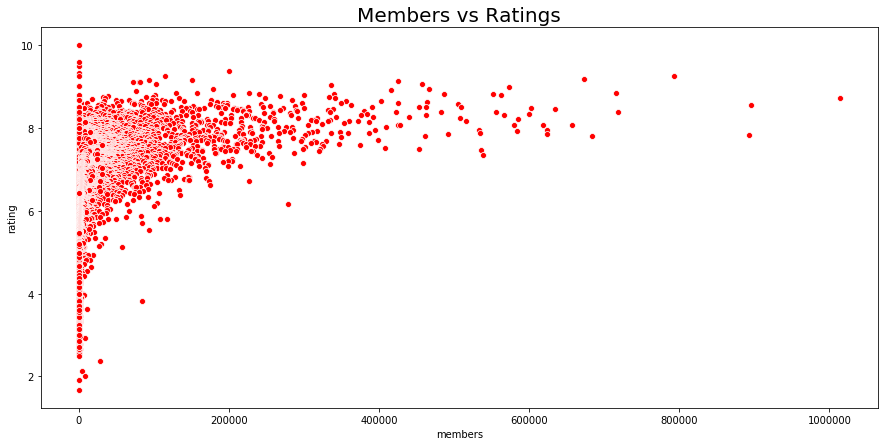

In [24]:
# lets check the episodes vs Ratings

plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(anime['members'],
                anime['rating'],
                color = 'red')
plt.title('Members vs Ratings', fontsize = 20)
plt.show()

In [25]:
anime['episodes'] = anime['episodes'].astype('int')

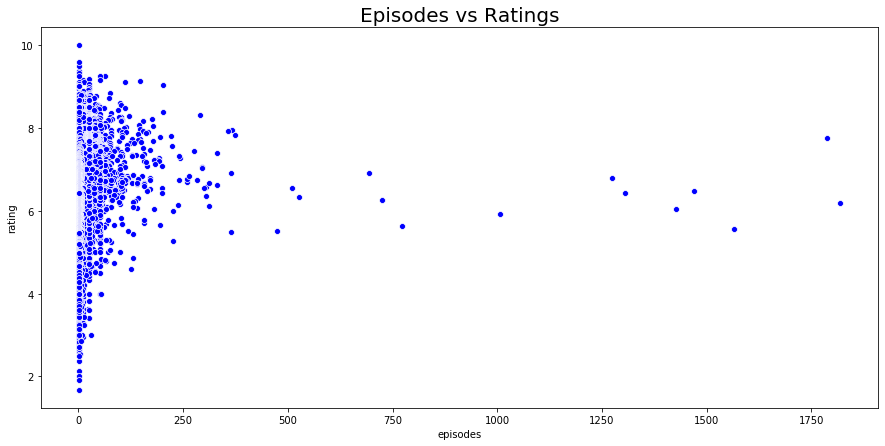

In [26]:
# lets check the episodes vs Ratings

plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(anime['episodes'],
                anime['rating'],
                color = 'blue')
plt.title('Episodes vs Ratings', fontsize = 20)
plt.show()


In [27]:
# lets check the Top Rated Animes

x = anime[['name','rating']]
x = x.sort_values(by = 'rating', ascending = False)
x.head(30)

,name,rating
10464,Taka no Tsume 8: Yoshida-kun no X-Files,10.00
10400,Spoon-hime no Swing Kitchen,9.60
9595,Mogura no Motoro,9.50
0,Kimi no Na wa.,9.37
9078,Kahei no Umi,9.33
1,Fullmetal Alchemist: Brotherhood,9.26
2,Gintama°,9.25
10786,Yakusoku: Africa Mizu to Midori,9.25
3,Steins;Gate,9.17
4,Gintama&#039;,9.16


In [28]:
# lets do some interactive analysis

@interact
def show_anime(column = 'rating', x = 9.0):
    a = anime[['name','rating']]
    return a.loc[a[column] > x]
    


interactive(children=(Text(value='rating', description='column'), FloatSlider(value=9.0, description='x', max=…

In [29]:
@interact
def show_anime(column = 'episodes', x = 1000):
    a = anime[['name','episodes','rating']]
    return a.loc[a[column] > x]
    

interactive(children=(Text(value='episodes', description='column'), IntSlider(value=1000, description='x', max…

In [30]:
@interact
def show_anime(column = 'members', x = 800000):
    a = anime[['name','members','episodes','rating']]
    return a.loc[a[column] > x]
    

interactive(children=(Text(value='members', description='column'), IntSlider(value=800000, description='x', ma…

In [31]:
@interact
def correlations(column1 = list(anime.select_dtypes('number').columns),
                 column2 = list(anime.select_dtypes('number').columns[1:])):
    print(f"Correlations: ", {anime[column1].corr(anime[column2])})


interactive(children=(Dropdown(description='column1', options=('anime_id', 'episodes', 'rating', 'members'), v…

In [32]:
@interact
def covariance(column1 = list(anime.select_dtypes('number').columns),
                 column2 = list(anime.select_dtypes('number').columns[1:])):
    print(f"Covariance: ", {anime[column1].corr(anime[column2])})


interactive(children=(Dropdown(description='column1', options=('anime_id', 'episodes', 'rating', 'members'), v…

In [33]:
# lets rename the ratings dataset
user = ratings

In [34]:
# User 1 has a negative in rating mean
user[user['user_id']==1].rating.mean()

-0.7124183006535948

In [35]:
# User 2 has a very low in rating mean
user[user['user_id']==2].rating.mean()

2.6666666666666665

In [36]:
# Rating mean of user 5 is very close to 5 which is half of max rating
user[user['user_id']==5].rating.mean()

4.263383297644539

In [37]:
# lets check the Statistics of Average Ratings

print("Average User Ratings: ", user['rating'].mean())
print("Maximum User Ratings: ", user['rating'].max())
print("Minimum User Ratings: ", user['rating'].min())
print("Standard Deviation: ", user['rating'].std())

Average User Ratings:  6.144029546937656
Maximum User Ratings:  10
Minimum User Ratings:  -1
Standard Deviation:  3.7278004200545007


In [38]:
# lets check the group by tables

x = user.groupby(['user_id']).agg('mean')
x = x.sort_values(by = 'rating', ascending = False)
x.head(10)

,anime_id,rating
user_id,,
33952,5114.0,10.0
64750,9031.0,10.0
26194,11406.0,10.0
54574,202.0,10.0
16328,2287.5,10.0
34194,9756.0,10.0
38894,1535.0,10.0
11789,227.0,10.0
38890,20.0,10.0


In [39]:
x = user.groupby(['user_id']).agg('mean')
x = x.sort_values(by = 'rating', ascending = True)
x.head(10)

,anime_id,rating
user_id,,
7035,2716.840909,-1.0
6513,3418.802885,-1.0
35136,12385.387097,-1.0
11863,10889.164474,-1.0
11864,6547.000000,-1.0
49636,13235.865922,-1.0
29877,6643.000000,-1.0
49632,918.775000,-1.0
15076,3291.851852,-1.0


In [40]:
x = user.groupby(['anime_id']).agg('mean')
x = x.sort_values(by = 'rating', ascending = False)
x.head(10)

,user_id,rating
anime_id,,
34252,34071.000000,10.000000
33791,33960.000000,10.000000
31211,26895.000000,10.000000
33484,69497.000000,10.000000
30939,9032.000000,9.000000
31972,49322.000000,9.000000
29837,62753.000000,9.000000
32422,18054.000000,9.000000
30484,39297.000000,8.500000


In [41]:
@interact
def show_anime(column = 'rating', x = 9.8):
    return user.loc[user[column] > x]

interactive(children=(Text(value='rating', description='column'), FloatSlider(value=9.8, description='x', max=…

In [42]:
MRPU = user.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

In [43]:
MRPU.head(10)

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383
5,6,-1.000000
6,7,7.387755
7,8,8.333333
8,9,8.000000
9,10,2.875000


In [44]:
user = pd.merge(user,MRPU,on=['user_id','user_id'])
user.head(5)

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


In [45]:
user = user.drop(user[user.rating < user.mean_rating].index)

In [46]:
# anime which are assigned as user 1 favorite anime

user[user['user_id']== 1].head(10)

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418


In [47]:
user = user.rename({'rating':'userRating'}, axis='columns')

In [48]:
user.columns

Index(['user_id', 'anime_id', 'userRating', 'mean_rating'], dtype='object')

In [49]:
# merge 2 dataset
mergedata = pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata= mergedata[mergedata.user_id <= 20000]
mergedata.head(10)

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8,7.374593
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10,8.062500
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10,8.112360
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10,8.388889
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10,8.680328


In [50]:
len(mergedata['anime_id'].unique())

7852

In [51]:
len(anime['anime_id'].unique())


12294

In [52]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])
user_anime.head(10)


name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
user_anime.shape


(20000, 7852)

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [55]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-1.579129,-0.500240,0.415763
1,-1.773553,-0.272593,0.116388
2,0.218814,-1.232282,-0.985804
3,0.199435,-0.291005,0.681060
4,3.532125,-0.184796,-0.743312


In [56]:
tocluster = pd.DataFrame(ps[[0,1,2]])

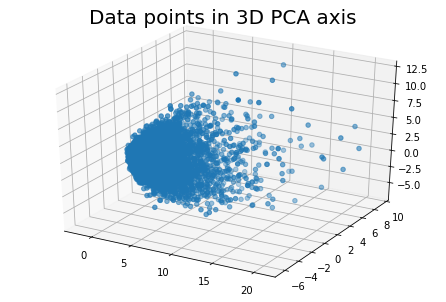

In [57]:
plt.rcParams['figure.figsize'] = (16, 9)
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))
    


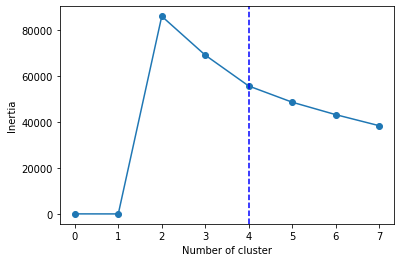

In [59]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

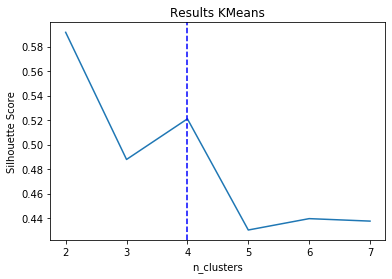

In [60]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

In [61]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[-1.08874971 -0.04026583  0.06666454]
 [ 7.61700382 -0.64256848  0.8395583 ]
 [ 1.6784451   2.31533838 -0.02522548]
 [ 1.97875213 -1.1265422  -0.43514847]]


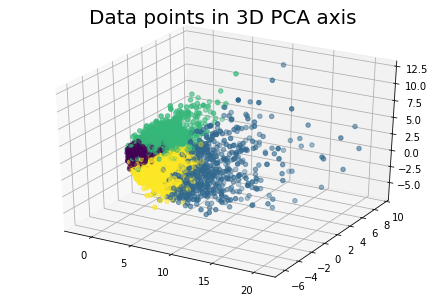

In [62]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()


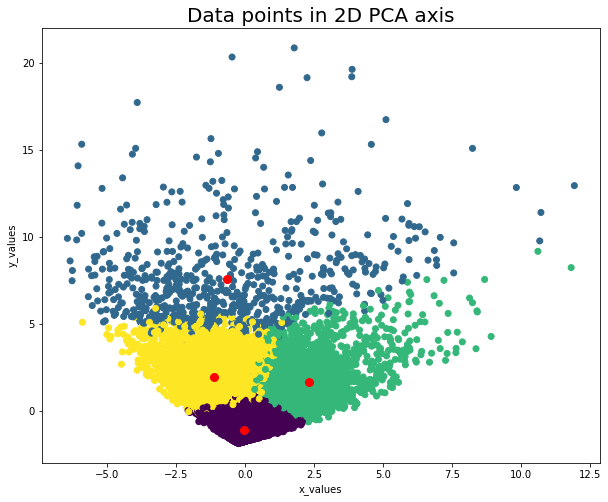

In [63]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [64]:
user_anime['cluster'] = c_preds
user_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Columns: 7853 entries, &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi to cluster
dtypes: int32(1), int64(7852)
memory usage: 1.2 GB


In [65]:
c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()

## Cluster 0

In [66]:
c0.sort_values(ascending=False)[0:15]

name
Death Note                            0.320642
Shingeki no Kyojin                    0.230444
Sword Art Online                      0.198824
Fullmetal Alchemist: Brotherhood      0.181616
Code Geass: Hangyaku no Lelouch       0.178820
Sen to Chihiro no Kamikakushi         0.159963
Angel Beats!                          0.157095
Fullmetal Alchemist                   0.155661
Code Geass: Hangyaku no Lelouch R2    0.153510
Naruto                                0.146125
Elfen Lied                            0.144045
Ouran Koukou Host Club                0.133792
Mirai Nikki (TV)                      0.121388
Toradora!                             0.117803
Howl no Ugoku Shiro                   0.114433
dtype: float64

In [67]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name']==x].episodes.values.astype(int))
            member_list.append(anime[anime['name']==x].members.values.astype(int))
            rating_list.append(anime[anime['name']==x].rating.values.astype(int))
            for y in anime[anime['name']==x].genre.values:
                 genre_list.append(y)
    return genre_list,episode_list,rating_list,member_list
         

In [68]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count


In [69]:
animelist = list(c0.index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] =  createAnimeInfoList(animelist)

In [70]:
set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

In [71]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()


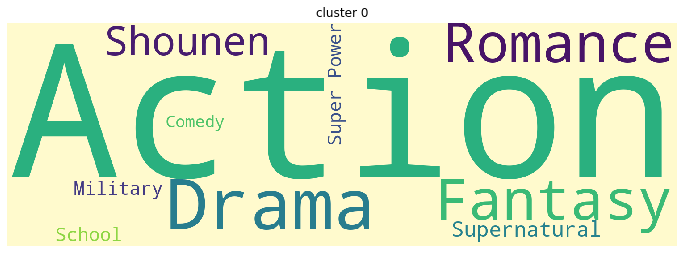

In [72]:
c0_animelist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  createAnimeInfoList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 0","lemonchiffon")

In [73]:
keyword_occurences[0:5]

[['Action', 10],
 [' Drama', 8],
 [' Fantasy', 5],
 [' Romance', 5],
 [' Shounen', 5]]

In [74]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

cluster 0
AVG episode : 38.46666666666667
AVG movie rating : 7.866666666666666
AVG member : 668177.0666666667


## Cluster 1

In [75]:
c1.sort_values(ascending=False)[0:15]

name
Angel Beats!                                           0.836524
No Game No Life                                        0.818851
Toradora!                                              0.815906
Code Geass: Hangyaku no Lelouch                        0.804124
Steins;Gate                                            0.792342
Shingeki no Kyojin                                     0.783505
Code Geass: Hangyaku no Lelouch R2                     0.777614
Sword Art Online                                       0.768778
Bakemonogatari                                         0.756996
Death Note                                             0.755523
Hataraku Maou-sama!                                    0.730486
Fullmetal Alchemist: Brotherhood                       0.730486
Clannad                                                0.724595
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.720177
Chuunibyou demo Koi ga Shitai!                         0.718704
dtype: float64

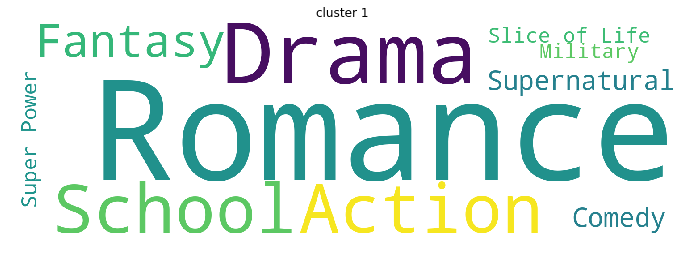

In [76]:
c1_animelist = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeInfoList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","white")

In [77]:
keyword_occurences[0:5]

[[' Romance', 7],
 [' Drama', 7],
 ['Action', 6],
 [' School', 6],
 [' Fantasy', 5]]

In [78]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

cluster 1
AVG episode : 23.4
AVG movie rating : 8.0
AVG member : 647913.0666666667


## Cluster 2

In [79]:
c2.sort_values(ascending=False)[0:15]

name
Death Note                            0.680644
Code Geass: Hangyaku no Lelouch       0.668454
Code Geass: Hangyaku no Lelouch R2    0.609459
Fullmetal Alchemist                   0.600195
Sen to Chihiro no Kamikakushi         0.583618
Suzumiya Haruhi no Yuuutsu            0.551438
Neon Genesis Evangelion               0.537786
Tengen Toppa Gurren Lagann            0.529498
Cowboy Bebop                          0.525110
Fullmetal Alchemist: Brotherhood      0.509995
Mononoke Hime                         0.499756
Toradora!                             0.489030
Elfen Lied                            0.484154
Howl no Ugoku Shiro                   0.479766
Samurai Champloo                      0.477328
dtype: float64

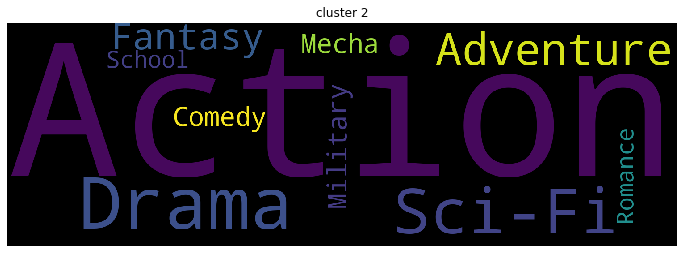

In [80]:
c2_animelist = list(c2.sort_values(ascending=False)[0:15].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  createAnimeInfoList(c2_animelist)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","black")

In [81]:
keyword_occurences[0:5]

[['Action', 10],
 [' Drama', 8],
 [' Sci-Fi', 6],
 [' Adventure', 6],
 [' Fantasy', 4]]

In [82]:
c2_data['episode'].mean()

24.133333333333333

In [83]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

cluster 2
AVG episode : 24.133333333333333
AVG movie rating : 8.0
AVG member : 561513.7333333333


## Cluster 3

In [84]:
c3.sort_values(ascending=False)[0:15]

name
Shingeki no Kyojin                                          0.726753
No Game No Life                                             0.644598
Sword Art Online                                            0.613602
Angel Beats!                                                0.598255
Death Note                                                  0.591032
Steins;Gate                                                 0.551610
Fullmetal Alchemist: Brotherhood                            0.539874
Toradora!                                                   0.517605
Mirai Nikki (TV)                                            0.513993
Code Geass: Hangyaku no Lelouch                             0.506169
Code Geass: Hangyaku no Lelouch R2                          0.478182
Noragami                                                    0.464941
One Punch Man                                               0.464039
Tokyo Ghoul                                                 0.462534
Ano Hi Mita Hana no Namae wo 

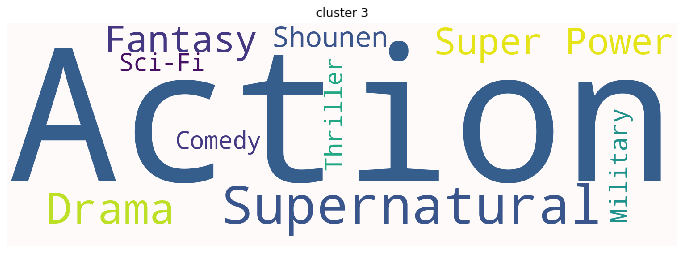

In [85]:
c3_animelist = list(c3.sort_values(ascending=False)[0:15].index)
c3_data = pd.DataFrame()
c3_data['genre'],c3_data['episode'],c3_data['rating'],c3_data['member'] =  createAnimeInfoList(c3_animelist)
c3_data.iloc[:,1:4] = c3_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","snow")


In [86]:
keyword_occurences[0:5]

[['Action', 10],
 [' Supernatural', 8],
 [' Drama', 5],
 [' Super Power', 4],
 [' Fantasy', 4]]

In [87]:
print('cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c3_data['episode'].mean(), c3_data['rating'].mean(),c3_data['member'].mean()))

cluster 3
AVG episode : 23.2
AVG movie rating : 8.066666666666666
AVG member : 687956.2


## Collaborative Filtering

In [88]:
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator

In [89]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [90]:
rating.rating.replace({-1: np.nan}, regex=True, inplace = True)
rating.head()


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [91]:
# separting only TV Animes

anime_tv = anime[anime['type']=='TV']
anime_tv.head()

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351


In [92]:
# Join the two dataframes on the anime_id columns

merged = rating.merge(anime_tv, left_on = 'anime_id', right_on = 'anime_id', suffixes= ['_user', ''])
merged.rename(columns = {'rating_user':'user_rating'}, inplace = True)

In [93]:
# For computing reasons I'm limiting the dataframe length to 10,000 users

merged=merged[['user_id', 'name', 'user_rating']]
merged_sub= merged[merged.user_id <= 10000]
merged_sub.head()

,user_id,name,user_rating
0,1,Naruto,-1
1,3,Naruto,8
2,5,Naruto,6
3,6,Naruto,-1
4,10,Naruto,-1


In [94]:
piv = merged_sub.pivot_table(index=['user_id'], columns=['name'], values='user_rating')
piv.head(10)

name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,3 Choume no Tama: Uchi no Tama Shirimasenka?,30-sai no Hoken Taiiku,91 Days,...,"Zone of the Enders: Dolores, I",Zukkoke Knight: Don De La Mancha,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Note: As we are subtracting the mean from each rating to standardize
# all users with only one rating or who had rated everything the same will be dropped

# Normalize the values
piv_norm = piv.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)


# Drop all columns containing only zeros representing users who did not rate
piv_norm.fillna(0, inplace=True)
piv_norm = piv_norm.T
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis=0)]


In [96]:
# Our data needs to be in a sparse matrix format to be read by the following functions

piv_sparse = sp.sparse.csr_matrix(piv_norm.values)


In [97]:
item_similarity = cosine_similarity(piv_sparse)
user_similarity = cosine_similarity(piv_sparse.T)

In [98]:
# Inserting the similarity matricies into dataframe objects

item_sim_df = pd.DataFrame(item_similarity, index = piv_norm.index, columns = piv_norm.index)
user_sim_df = pd.DataFrame(user_similarity, index = piv_norm.columns, columns = piv_norm.columns)

In [99]:
# This function will return the top 10 shows with the highest cosine similarity value

def top_animes(anime_name):
    count = 1
    print('Similar shows to {} include:\n'.format(anime_name))
    for item in item_sim_df.sort_values(by = anime_name, ascending = False).index[1:11]:
        print('No. {}: {}'.format(count, item))
        count +=1  

In [100]:
# This function will return the top 5 users with the highest similarity value 

def top_users(user):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    print('Most Similar Users:\n')
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        print('User #{0}, Similarity value: {1:.2f}'.format(user, sim)) 

In [101]:
# This function constructs a list of lists containing the highest rated shows per similar user
# and returns the name of the show along with the frequency it appears in the list

def similar_user_recs(user):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    best = []
    most_common = {}
    
    for i in sim_users:
        max_score = piv_norm.loc[:, i].max()
        best.append(piv_norm[piv_norm.loc[:, i]==max_score].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] += 1
            else:
                most_common[j] = 1
    sorted_list = sorted(most_common.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_list[:5]  

In [102]:
# This function calculates the weighted average of similar users
# to determine a potential rating for an input user and show

def predicted_rating(anime_name, user):
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:1000]
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:1000]
    rating_list = []
    weight_list = []
    for j, i in enumerate(sim_users):
        rating = piv.loc[i, anime_name]
        similarity = user_values[j]
        if np.isnan(rating):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    return sum(rating_list)/sum(weight_list)   

In [103]:
top_animes('Cowboy Bebop')

Similar shows to Cowboy Bebop include:

No. 1: Samurai Champloo
No. 2: Tengen Toppa Gurren Lagann
No. 3: Neon Genesis Evangelion
No. 4: Black Lagoon
No. 5: Great Teacher Onizuka
No. 6: Trigun
No. 7: Black Lagoon: The Second Barrage
No. 8: Baccano!
No. 9: Fullmetal Alchemist: Brotherhood
No. 10: Ghost in the Shell: Stand Alone Complex


In [104]:
top_users(3)

Most Similar Users:

User #4647, Similarity value: 0.55
User #2277, Similarity value: 0.54
User #3225, Similarity value: 0.47
User #934, Similarity value: 0.41
User #1406, Similarity value: 0.38
User #6563, Similarity value: 0.38
User #4037, Similarity value: 0.36
User #1038, Similarity value: 0.35
User #9577, Similarity value: 0.35
User #3028, Similarity value: 0.32


In [105]:
similar_user_recs(3)

[('Fullmetal Alchemist: Brotherhood', 7),
 ('Shingeki no Kyojin', 4),
 ('Toradora!', 3),
 ('Kiseijuu: Sei no Kakuritsu', 3),
 ('Akame ga Kill!', 2)]

In [106]:
predicted_rating('Cowboy Bebop', 3)

8.06794597380504

# THANK YOU :)